# Exercise 2 Task 4

We consider the elliptic problem
$$\begin{cases} -\Delta y+y&=f\quad \text{in}\ \Omega:=[-1,1]^2\\ -\frac{\partial y}{\partial \nu}&=g\quad\text{on}\ \partial\Omega \end{cases}$$

a) Compute $f$ and $g$ such that $y(x)=\lVert x\rVert_{\ell^2}=x_1^2+x_2^2$ is the unique solution.

We find
$$\begin{align*}
f(x)&=-\Delta y(x)+y(x)=-4+y(x)=-4+x_1^2+x_2^2 \\
g(x)&=-\frac{\partial y(x)}{\partial \nu(x)}=-\nabla y(x)\cdot\nu(x)=-\begin{pmatrix} 2x_1\\2x_2 \end{pmatrix}\cdot\nu(x)=
\begin{cases}
-\begin{pmatrix} 2x_1\\2x_2 \end{pmatrix}\cdot\begin{pmatrix} -1\\0 \end{pmatrix}=2x_1 &\text{on}\ \{-1\}\times[-1,1] \\
-\begin{pmatrix} 2x_1\\2x_2 \end{pmatrix}\cdot\begin{pmatrix} 0\\-1 \end{pmatrix}=2x_2 &\text{on}\ [-1,1]\times\{-1\} \\
-\begin{pmatrix} 2x_1\\2x_2 \end{pmatrix}\cdot\begin{pmatrix} 1\\0 \end{pmatrix}=-2x_1 &\text{on}\ \{1\}\times[-1,1] \\
-\begin{pmatrix} 2x_1\\2x_2 \end{pmatrix}\cdot\begin{pmatrix} 0\\1 \end{pmatrix}=-2x_2 &\text{on}\ [-1,1]\times\{1\}
\end{cases}=-2
\end{align*}$$

b) Compute the finite-element approximation for 5 refinement levels and the resulting $L^2$-error.

For Gridap we need the week formulation of the problem. We get with Green's formula
$$\int\limits_\Omega -\Delta y\varphi+y\phi\,\mathrm dx=\int\limits_\Omega \nabla y\cdot\nabla\varphi\,\mathrm dx-\int\limits_{\partial\Omega} \nabla y\cdot\nu\,\varphi\,\mathrm ds+\int\limits_\Omega y\varphi\,\mathrm dx=\int\limits_\Omega f\varphi\,\mathrm dx$$
where inputting the boundary condition leads to
$$\begin{align*} a(y,\varphi)&=\int\limits_\Omega \nabla y\cdot\nabla\varphi\,\mathrm dx+\int\limits_\Omega y\varphi\,\mathrm dx \\ l(\varphi)&=\int\limits_\Omega f\varphi\,\mathrm dx-\int\limits_{\partial\Omega} g\varphi\,\mathrm ds \end{align*}$$
The following code produces three plots: the grid, the numerical solution (finite-element approximation) and the error $u-u_h$. Lastly, the L2-norm of the error is printed.

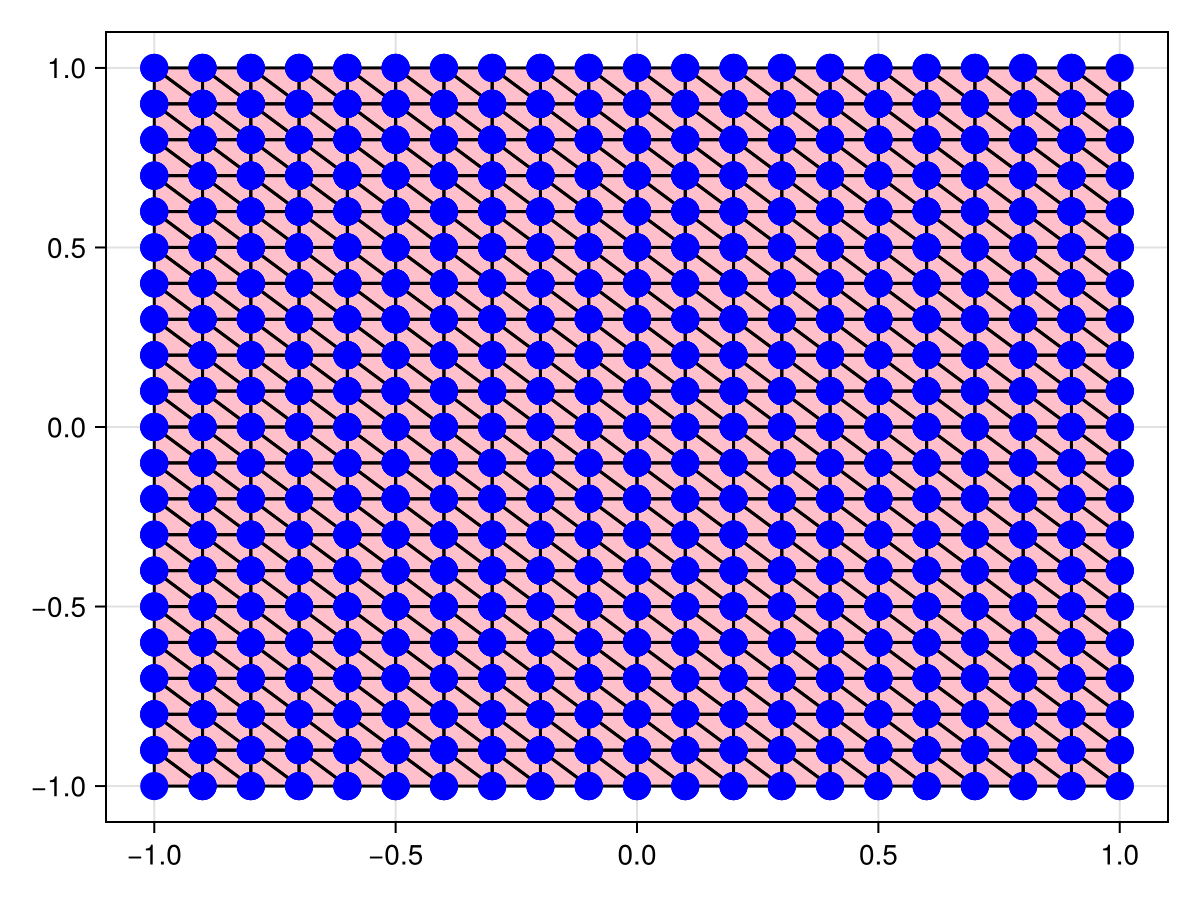

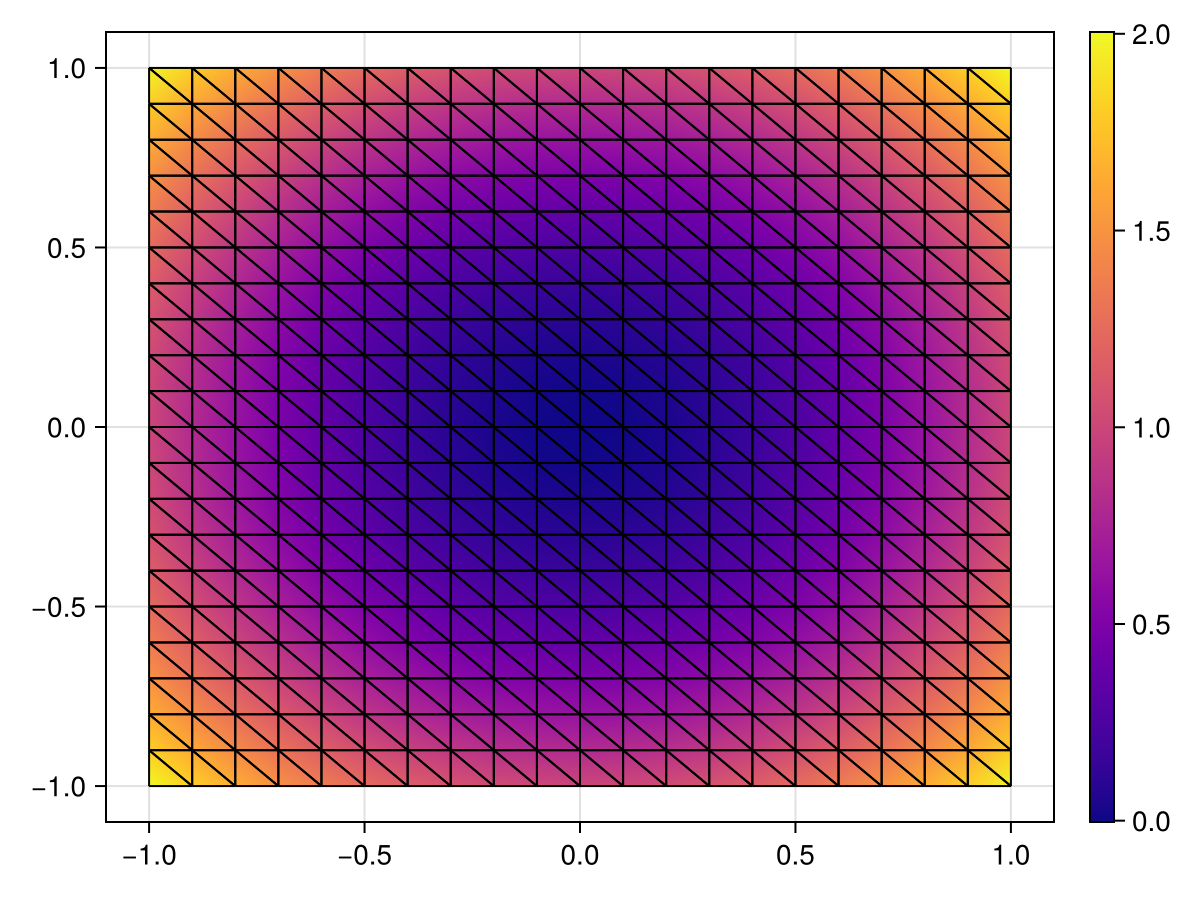

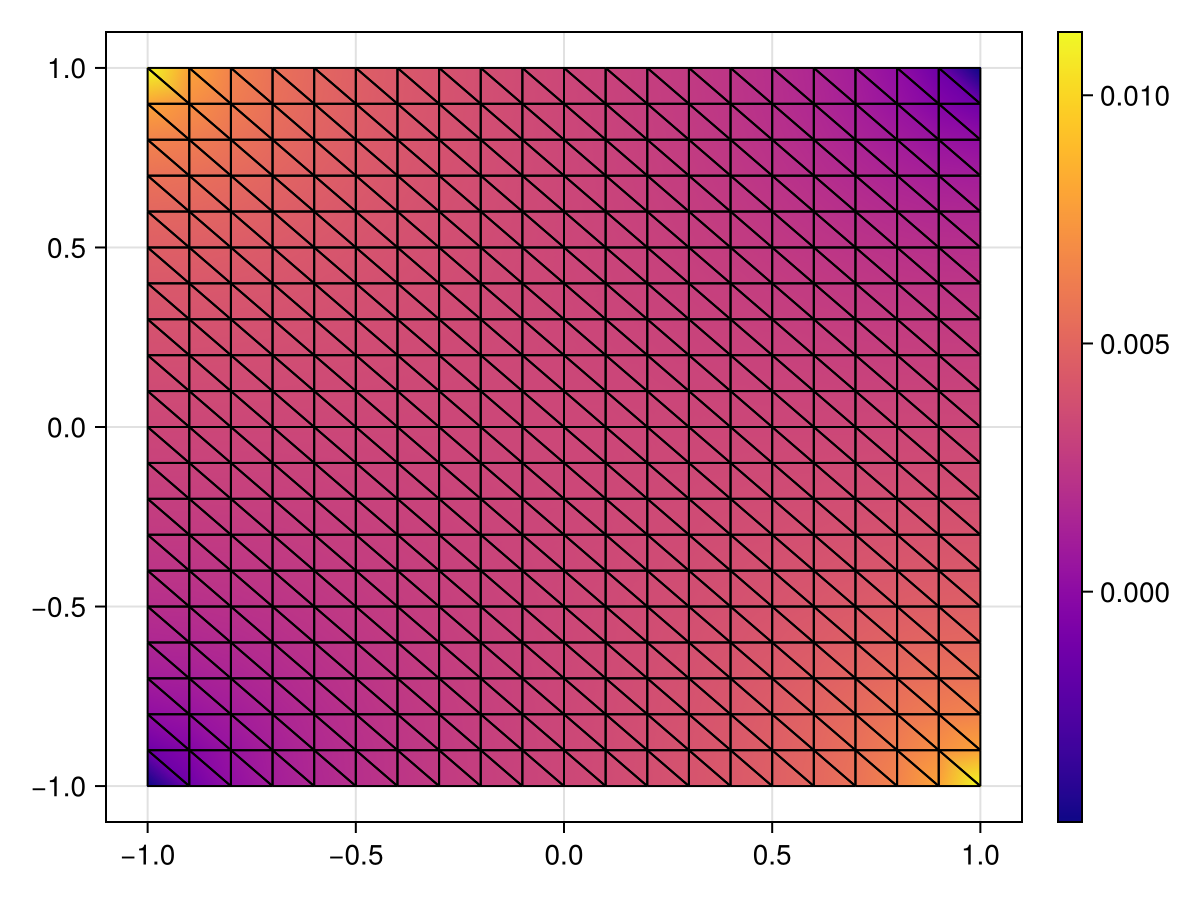

The L2 error ||u-uₕ|| is 0.002663630099278158

In [4]:
using Gridap

u(x) = x[1]^2 + x[2]^2
f(x) = u(x)-4
g(x) = -2
    

domain = (-1, 1, -1, 1)
partition = nx, ny = 20,20
model = CartesianDiscreteModel(domain, partition) |> simplexify

using GridapMakie, CairoMakie, FileIO
Ω = Triangulation(model)                                # make Triangulation
fig = plot(Ω)
wireframe!(Ω, color=:black)                             # Plot edges of each element
scatter!(Ω, marker=:circle, markersize=20, color=:blue) # Plot mesh nodes
display(fig)                                            # show plot
save("Exercise3_task2_Triangulation.svg", fig)          # save for later


order = 1
reffe = ReferenceFE(lagrangian,Float64,order)
Testspace = TestFESpace(model,reffe,conformity=:H1)     # no Dirichlet (/ everything Neumann)

Trialspace = TrialFESpace(Testspace)                    # make trial space based on test space

degree = 2*order                                        # degree of the method used for approximating integrals over Ω                   
dΩ = Measure(Ω,degree)                                  # make the measure dΩ

Γ = BoundaryTriangulation(model)                        # triangulate the boundary ∂Ω
dΓ = Measure(Γ,degree)                                  # measure on Γ

a(u,ϕ) = ∫( ∇(ϕ)⊙∇(u)+u*ϕ)*dΩ                          # bilinear form
l(ϕ) = ∫( ϕ*f )*dΩ - ∫( ϕ*g )*dΓ                        # linear functional

op = AffineFEOperator(a,l,Trialspace,Testspace)         # make FE operator - affine because the PDE is affine

uh = solve(op)                                          # solve problem

fig, _ , plt = plot(Ω, uh, colormap=:plasma)            # make plot of u_h
wireframe!(Ω, color=:black, linewidth=1)                # add triangulation to plot
Colorbar(fig[1,2], plt)                                 # add color bar
display(fig)                                            # show plot
save("Exercise3_task2_Solution.svg", fig)               # save picture


e = u - uh                                              # error

fig, _ , plt = plot(Ω, e, colormap=:plasma)             # plot of error
wireframe!(Ω, color=:black, linewidth=1)                # add triangulation
Colorbar(fig[1,2], plt)                                 # add color bar
display(fig)                                            # show plot
save("Exercise3_task2_Error.svg", fig)                  # save picture

el2 = sqrt(sum( ∫( e*e )*dΩ ))                         # calculate ||u-u_h||_L2
print("The L2 error ||u-uₕ|| is $el2")

In [1]:
import Pkg; Pkg.add("GridapMakie")
import Pkg; Pkg.add("CairoMakie")
import Pkg; Pkg.add("FileIO")

   Resolving package versions...
   Installed libwebp_jll ─ v1.5.0+0
   Installed Libtiff_jll ─ v4.7.1+0
   Installed x264_jll ──── v10164.0.1+0
   Installed OpenSSL_jll ─ v3.0.16+0
   Installed x265_jll ──── v3.6.0+0
   Installed LERC_jll ──── v4.0.1+0
   Installed FFMPEG_jll ── v6.1.2+0
    Updating `C:\Users\Bruker\.julia\environments\v1.11\Project.toml`
  [41f30b06] + GridapMakie v0.1.4
    Updating `C:\Users\Bruker\.julia\environments\v1.11\Manifest.toml`
  [35492f91] + AdaptivePredicates v1.2.0
  [66dad0bd] + AliasTables v1.1.3
  [27a7e980] + Animations v0.4.2
  [67c07d97] + Automa v1.1.0
  [13072b0f] + AxisAlgorithms v1.1.0
  [39de3d68] + AxisArrays v0.4.7
  [fa961155] + CEnum v0.5.0
  [d360d2e6] + ChainRulesCore v1.25.1
  [a2cac450] + ColorBrewer v0.4.1
  [35d6a980] + ColorSchemes v3.29.0
⌅ [3da002f7] + ColorTypes v0.11.5
⌃ [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.13.0
  [d38c429a] + Contour v0.6.3
  [9a962f9c] + DataAPI v1.16.0
  [e2d170a0] + DataValueInt